In [1]:
import scipy.io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

In [2]:
""" Load the Datasets"""

chainlink_mat = scipy.io.loadmat("../data/chainlink.mat")
tetra_mat = scipy.io.loadmat("../data/tetra.mat")

In [3]:
""" Get Features, Labels and a split variable """

# Chainlink
chain_data = chainlink_mat["data"]
chain_classes = chainlink_mat["class"]
chain_split = int(len(chain_classes)/2) # 500

# Tetra
tetra_data = tetra_mat["data"]
tetra_classes = tetra_mat["class"]
tetra_split = int(len(tetra_classes)/4) # 100

In [4]:
print("chainlink data:", chain_data.shape, chain_classes.shape)
print("terta data:", tetra_data.shape, tetra_classes.shape)

chainlink data: (1000, 3) (1000, 1)
terta data: (400, 3) (400, 1)


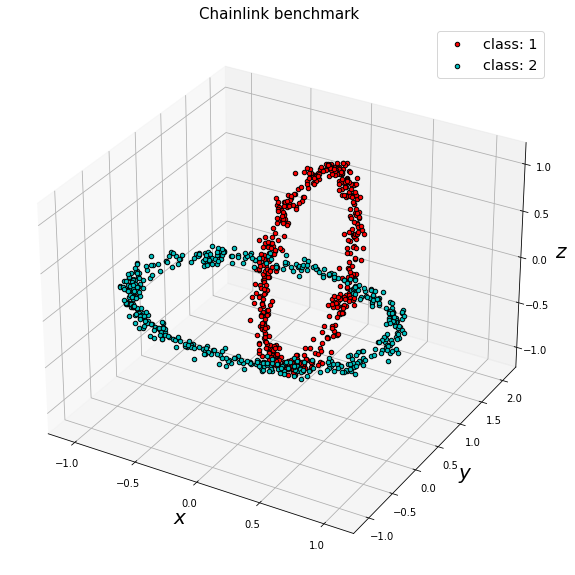

In [5]:
""" Visualize chainlink dataset """

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

ax.scatter(chain_data[chain_split:,0],
           chain_data[chain_split:,1],
           zs=chain_data[chain_split:,2],
           label="class: 1",c="r",
           edgecolors="black",
           depthshade=False)

ax.scatter(chain_data[:chain_split,0],
           chain_data[:chain_split,1], 
           zs=chain_data[:chain_split,2],
           label="class: 2", c="c",
           edgecolors="black",
           depthshade=False)

ax.legend(fontsize="x-large")
ax.set_zlabel("$z$", size=20)
ax.set_xlabel("$x$", size=20)
ax.set_ylabel("$y$", size=20)
ax.set_title("Chainlink benchmark", size=15)

plt.show()

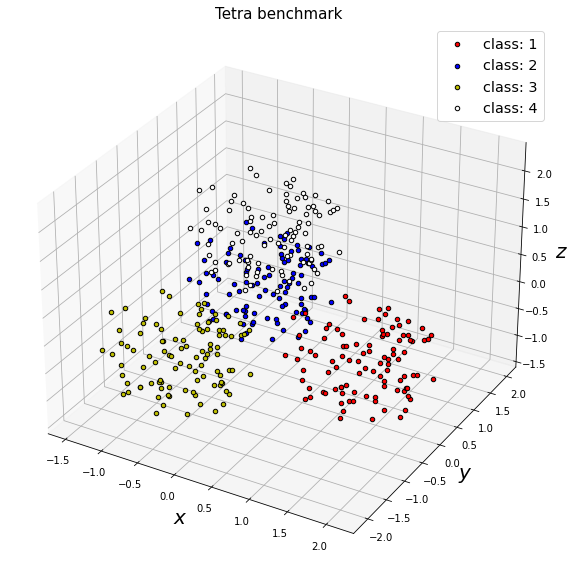

In [6]:
""" Visualize tetra dataset """

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
color = [_, "r", "b", "y", "w"]

for i in range(tetra_split, len(tetra_classes)+tetra_split, tetra_split):
    begin = i-tetra_split
    
    ax.scatter(tetra_data[begin:i, 0],
               tetra_data[begin:i, 1],
               zs=tetra_data[begin:i, 2],
               label="class: {}".format(int(i/tetra_split)),
               c=color[int(i/100)],
               edgecolors="black",
               depthshade=False)
        
ax.legend(fontsize="x-large")
ax.set_zlabel("$z$", size=20)
ax.set_xlabel("$x$", size=20)
ax.set_ylabel("$y$", size=20)
ax.set_title("Tetra benchmark", size=15)

plt.show()

In [7]:
"""Apply One Hot"""

tetra_encoder = OneHotEncoder().fit(tetra_classes)
tetra_classes = tetra_encoder.transform(tetra_classes).toarray()

chain_encoder = OneHotEncoder().fit(chain_classes)
chain_classes = chain_encoder.transform(chain_classes).toarray()

In [8]:
print("tetra_onehot:", tetra_classes.shape,"\n", tetra_classes[199:201],"\n")
print("chainlink_onehot:", chain_classes.shape,"\n", chain_classes[499:501])

tetra_onehot: (400, 4) 
 [[0. 1. 0. 0.]
 [0. 0. 1. 0.]] 

chainlink_onehot: (1000, 2) 
 [[1. 0.]
 [0. 1.]]


In [9]:
""" Define models """

class Model():
    def __init__(self):
        self.tetra = tf.keras.Sequential([
            layers.Dense(20, activation="relu", input_dim=3),
            layers.Dense(4, activation="softmax")
        ])
        self.chainlink = tf.keras.Sequential([
            layers.Dense(20, activation="relu", input_dim=3),
            layers.Dense(2, activation="softmax")
        ])
    def get_model(self, benchmark="chainlink"):
        if benchmark == "tetra":
            return self.tetra
        return self.chainlink

In [10]:
""" Initialize models """

chainlink_model = Model().get_model()
tetra_model = Model().get_model("tetra")

chainlink_model.compile(loss="categorical_crossentropy",
                        optimizer=SGD(lr=1e-3),
                        metrics=["accuracy"])

tetra_model.compile(loss="categorical_crossentropy",
                    optimizer=SGD(lr=1e-3),
                    metrics=["accuracy"])

In [11]:
""" Train """
chain_hist = chainlink_model.fit(chain_data, chain_classes,
                                 epochs=100, batch_size=16,
                                 shuffle=True)
tetra_hist = tetra_model.fit(tetra_data, tetra_classes,
                             epochs=100, batch_size=16,
                             shuffle=True)

Epoch 1/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6447 - accuracy: 0.6160
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6369 - accuracy: 0.6270
Epoch 3/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6299 - accuracy: 0.6450
Epoch 4/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6234 - accuracy: 0.6540
Epoch 5/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6174 - accuracy: 0.6540
Epoch 6/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6118 - accuracy: 0.6670
Epoch 7/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6066 - accuracy: 0.6760
Epoch 8/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6017 - accuracy: 0.6830
Epoch 9/100
63/63 [==============================] - 0s 2ms/step - loss: 0.5971 - accuracy: 0.6930
Epoch 10/100
63/63 [==============================] - 0s 2ms/step - loss: 0.5927 - accuracy: 0.6970
Epoch 11/

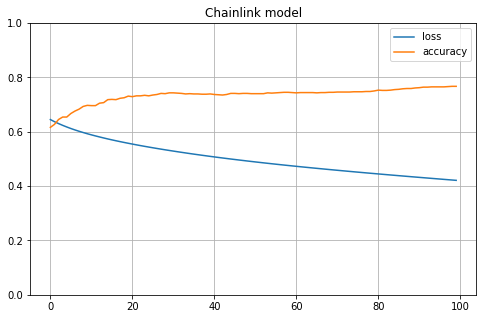

In [12]:
pd.DataFrame(chain_hist.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title("Chainlink model")
plt.gca().set_ylim(0, 1)
plt.show()

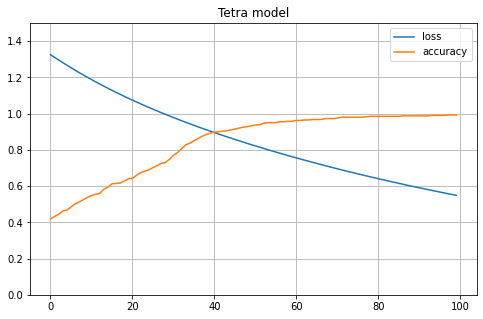

In [13]:
pd.DataFrame(tetra_hist.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.5)
plt.title("Tetra model")
plt.show()

In [14]:
chainlink_model.predict(chain_data).round(2)

array([[0.89, 0.11],
       [0.88, 0.12],
       [0.4 , 0.6 ],
       ...,
       [0.16, 0.84],
       [0.33, 0.67],
       [0.37, 0.63]], dtype=float32)

In [15]:
tetra_model.predict(tetra_data).round(2)

array([[0.74, 0.13, 0.08, 0.05],
       [0.77, 0.1 , 0.08, 0.05],
       [0.67, 0.18, 0.08, 0.06],
       ...,
       [0.09, 0.19, 0.33, 0.4 ],
       [0.13, 0.16, 0.24, 0.47],
       [0.26, 0.16, 0.26, 0.32]], dtype=float32)

In [16]:
"""optimize learning rate"""
from tensorflow.keras.callbacks import LearningRateScheduler

chain_hist = chainlink_model.fit(chain_data, chain_classes,
                                 epochs=100, batch_size=16,
                                 callbacks=[
                                     LearningRateScheduler(lambda epochs: 1e-3*10**(epochs/30))],
                                 shuffle=True)
tetra_hist = tetra_model.fit(tetra_data, tetra_classes,
                             epochs=100, batch_size=16,
                             callbacks=[
                                     LearningRateScheduler(lambda epochs: 1e-3*10**(epochs/30))],
                             shuffle=True)

Epoch 1/100
63/63 [==============================] - 0s 2ms/step - loss: 0.4199 - accuracy: 0.7680 - lr: 0.0010
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 0.4187 - accuracy: 0.7680 - lr: 0.0011
Epoch 3/100
63/63 [==============================] - 0s 2ms/step - loss: 0.4174 - accuracy: 0.7700 - lr: 0.0012
Epoch 4/100
63/63 [==============================] - 0s 2ms/step - loss: 0.4160 - accuracy: 0.7720 - lr: 0.0013
Epoch 5/100
63/63 [==============================] - 0s 2ms/step - loss: 0.4144 - accuracy: 0.7730 - lr: 0.0014
Epoch 6/100
63/63 [==============================] - 0s 2ms/step - loss: 0.4128 - accuracy: 0.7740 - lr: 0.0015
Epoch 7/100
63/63 [==============================] - 0s 2ms/step - loss: 0.4111 - accuracy: 0.7780 - lr: 0.0016
Epoch 8/100
63/63 [==============================] - 0s 2ms/step - loss: 0.4092 - accuracy: 0.7800 - lr: 0.0017
Epoch 9/100
63/63 [==============================] - 0s 2ms/step - loss: 0.4072 - accuracy: 0.7840 - lr:

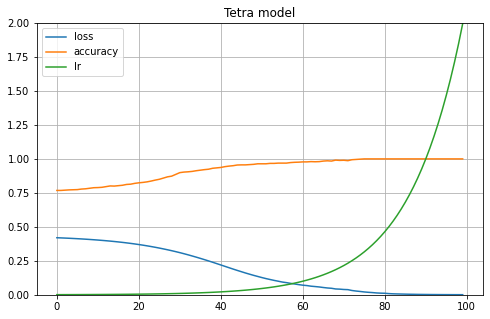

In [17]:
pd.DataFrame(chain_hist.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.title("Tetra model")
plt.show()

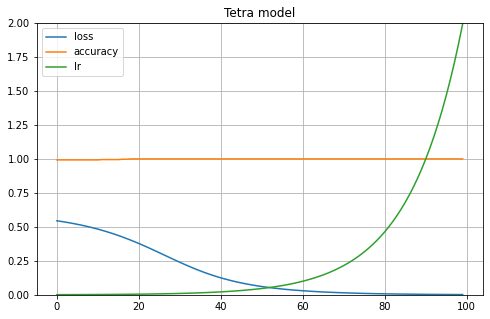

In [18]:
pd.DataFrame(tetra_hist.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.title("Tetra model")
plt.show()

Text(0, 0.5, 'loss')

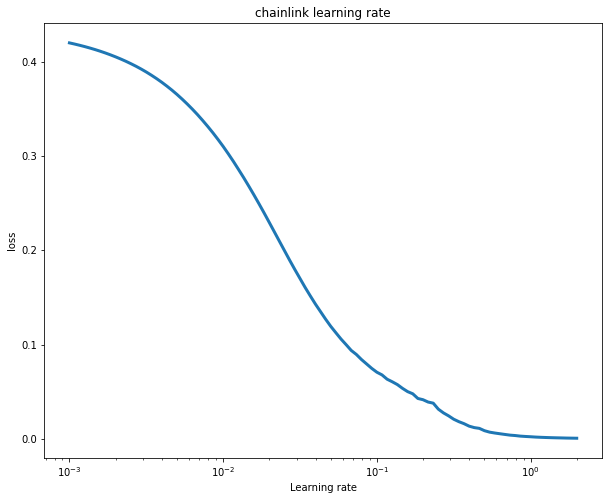

In [19]:
lr = 1e-3 * (10 ** (np.arange(100)/30))

plt.figure(figsize=(10, 8))
plt.semilogx(lr, chain_hist.history["loss"], lw=3)
plt.title("chainlink learning rate")
plt.xlabel("Learning rate")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

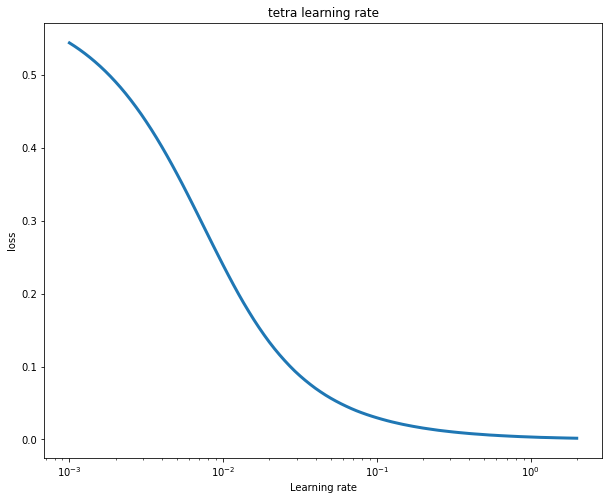

In [20]:
plt.figure(figsize=(10, 8))
plt.semilogx(lr, tetra_hist.history["loss"], lw=3)
plt.title("tetra learning rate")
plt.xlabel("Learning rate")
plt.ylabel("loss")

In [21]:
"""Lets see some crazy overfitting"""

tetra_model.compile(loss="categorical_crossentropy",
                    optimizer=SGD(lr=1),
                    metrics=["accuracy"])

chainlink_model.compile(loss="categorical_crossentropy",
                        optimizer=SGD(lr=1),
                        metrics=["accuracy"])

tetra_hist = tetra_model.fit(tetra_data, tetra_classes,
                             epochs=100, batch_size=16,
                             shuffle=True)

chain_hist = chainlink_model.fit(chain_data, chain_classes,
                                 epochs=100, batch_size=16,
                                 shuffle=True)

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 11/

In [22]:
tetra_pred = [1 if prob > 0.5 else 0 for prob in np.ravel(tetra_model.predict(tetra_data))]
tetra_pred = np.array(tetra_pred).reshape(400, 4)
tetra_pred

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]])

In [23]:
chain_pred = [1 if prob > 0.5 else 0 for prob in np.ravel(chainlink_model.predict(chain_data))]
chain_pred = np.array(chain_pred).reshape(1000, 2)
chain_pred

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]])

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

print("accuracy tetra:", accuracy_score(tetra_pred, tetra_classes))
print("accuracy chainlink:", accuracy_score(chain_pred, chain_classes))

accuracy tetra: 1.0
accuracy chainlink: 1.0


In [25]:
"""convert back from onehot encoding"""
tetra_pred_inv = tetra_encoder.inverse_transform(tetra_pred)
tetra_class_inv = tetra_encoder.inverse_transform(tetra_classes)

chain_pred_inv = chain_encoder.inverse_transform(chain_pred)
chain_class_inv = chain_encoder.inverse_transform(chain_classes)

print("tetra confusion matrix:\n", confusion_matrix(tetra_pred_inv, tetra_class_inv),"\n")
print("chainlink confusion matrix:\n", confusion_matrix(chain_pred_inv, chain_class_inv))

tetra confusion matrix:
 [[100   0   0   0]
 [  0 100   0   0]
 [  0   0 100   0]
 [  0   0   0 100]] 

chainlink confusion matrix:
 [[500   0]
 [  0 500]]


We havent ```train_test_split()``` the data in this approach, but it looks like the higher the learning rate the more accurate the classification, however, we are overfitting the training data and do not have any prediction on unseen data. But we have build a pretty accurate clustering model for this kind of data.